<a href="https://colab.research.google.com/github/baldpanda/mnist/blob/adding-cnn/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning TensorFlow and Keras- MNIST

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
print(tf.VERSION)

1.13.1


Keras comes with a number of inbuilt datasets. These include:

*   CIFAR10 AND CIFAR100 image classification (50,000 images with 10 and 100 different classes respectively)
*   MNIST
*   Fashion MNIST
*   Boston Housing Regression Dataset




In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print('The training data has shape: {}.'.format(X_train.shape))

The training data has shape:(60000, 28, 28).


In [0]:
print('The testing data has size: {}.'.format(X_test.shape[0]))

The testing data has size: 10000.


Plotting an image from the training data sampled at random.

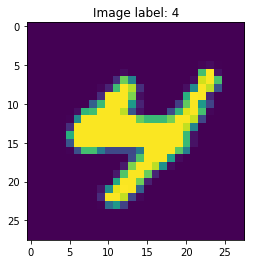

In [0]:
number_to_plot = random.randint(0,X_train.shape[0])
plt.title("Image label: {}".format(y_train[number_to_plot]))
plt.imshow(X_train[number_to_plot])
plt.show()

Normalising the data 

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Building a fully connected neural network and fitting on the training data

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 103us/sample - loss: 13.4921 - acc: 0.1627
Epoch 2/5
60000/60000 [==============================] - 5s 90us/sample - loss: 13.2982 - acc: 0.1749
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 13.1872 - acc: 0.1818
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 13.2813 - acc: 0.1759
Epoch 5/5
60000/60000 [==============================] - 5s 89us/sample - loss: 13.1745 - acc: 0.1826


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 64us/sample - loss: 13.1717 - acc: 0.1828


[13.171686080932616, 0.1828]

Building a basic 2 layer fully connected NN that achieves 97.8% accuracy on the test data. 

Adding callback function, which stops training once the model achieves an accuracy of xx.x% on the training data and adding an extra layer to the NN.

In [0]:
class myCallback(tf.keras.callbacks.Callback):  
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > 0.999:
      print("\nYou've exceded an accuracy of 99.9%")
      self.model.stop_training = True  

In [0]:
callbacks = myCallback()

In [0]:
two_layer_network = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [0]:
two_layer_network.compile(optimizer=tf.train.AdamOptimizer(),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [0]:
two_layer_network.fit(X_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1898 - acc: 0.9422
Epoch 2/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0803 - acc: 0.9751
Epoch 3/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0531 - acc: 0.9829
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0417 - acc: 0.9868
Epoch 5/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0309 - acc: 0.9900
Epoch 6/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0281 - acc: 0.9911
Epoch 7/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0221 - acc: 0.9929
Epoch 8/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0223 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0170 - acc: 0.9946
Epoch 10/10
60000/60000 [==============================] - 7s 116us/sampl

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Convolutional Neural Network

In [0]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [0]:
cnn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [0]:

cnn_model.fit(X_train, y_train, epochs=15, callbacks=[callbacks])

Epoch 1/15
60000/60000 [==============================] - 17s 277us/sample - loss: 0.1182 - acc: 0.9634
Epoch 2/15
60000/60000 [==============================] - 15s 244us/sample - loss: 0.0393 - acc: 0.9870
Epoch 3/15
60000/60000 [==============================] - 15s 245us/sample - loss: 0.0259 - acc: 0.9920
Epoch 4/15
60000/60000 [==============================] - 15s 243us/sample - loss: 0.0192 - acc: 0.9940
Epoch 5/15
60000/60000 [==============================] - 15s 243us/sample - loss: 0.0151 - acc: 0.9953
Epoch 6/15
60000/60000 [==============================] - 15s 246us/sample - loss: 0.0123 - acc: 0.9957
Epoch 7/15
60000/60000 [==============================] - 15s 245us/sample - loss: 0.0092 - acc: 0.9968
Epoch 8/15
60000/60000 [==============================] - 15s 243us/sample - loss: 0.0083 - acc: 0.9973
Epoch 9/15
60000/60000 [==============================] - 15s 245us/sample - loss: 0.0064 - acc: 0.9979
Epoch 10/15
60000/60000 [==============================] - 15s 2

In [0]:
cnn_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 108us/sample - loss: 0.0372 - acc: 0.9924


[0.037221015101025115, 0.9924]

CNN model is achieving an accuracy of 99.2% on the test set! 